# Dataset
* Use Stanford dog dataset with over 20k images of dogs, but only use 4096 images.
* Resize images to shape 12288 (64*64*3).
* Copy all resized images to numpy array of shape (12288, 4096).
* Any prediction above 50% is good!!!

In [1]:
import kagglehub

# Download latest version of stanford dog dataset
path_dogs_dataset = kagglehub.dataset_download("jessicali9530/stanford-dogs-dataset")

# Download latest version of stanford car dataset
path_cars_dataset = kagglehub.dataset_download("jessicali9530/stanford-cars-dataset")

C:\Users\ericbader\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 1.82G/1.82G [01:31<00:00, 21.5MB/s]

Extracting files...


In [42]:
# Store images and targets to hdf5 format

import numpy as np
from PIL import Image
import glob
import os
import h5py

SHAPE_IMAGES = (64, 64)

def generate_dataset(directory, shape=(64, 64), num_img=4096):
    image_paths = glob.glob(os.path.join(directory, '**', '*.*'), recursive=True)
    image_paths = [p for p in image_paths if p.lower().endswith(('.jpeg', '.jpg'))]
    images = []
    for path in image_paths:
        if len(images) >= num_img:
            break
        img = Image.open(path).convert('RGB').resize(shape)  # Convert to RGB and resize
        images.append(np.array(img).flatten())  # Flatten into a 12288 (64x64x3) array

    return np.array(images).T  # Shape 12288 x NUM_IMAGES

Xdogs = generate_dataset(path_dogs_dataset, shape=SHAPE_IMAGES)
Xcars = generate_dataset(path_cars_dataset, shape=SHAPE_IMAGES)
X = np.hstack((Xdogs, Xcars))
Ydogs = np.ones((1, Xdogs.shape[1]), dtype='int8')
Ycars = np.zeros((1, Xcars.shape[1]), dtype='int8')
Y = np.hstack((Ydogs, Ycars))

shuffled_indices = np.random.permutation(X.shape[1])
X = X[:, shuffled_indices]
Y = Y[:, shuffled_indices]

split_index = int(0.8 * X.shape[1])
Xtrain, Xtest = X[:, :split_index], X[:, split_index:]
Ytrain, Ytest = Y[:, :split_index], Y[:, split_index:]

# Open the HDF5 file for writing (creates the file if it doesn't exist)
with h5py.File('dogs.h5', 'w') as hf:
    hf.create_dataset('Xtrain', data=Xtrain)
    hf.create_dataset('Xtest', data=Xtest)
    hf.create_dataset('Ytrain', data=Ytrain)
    hf.create_dataset('Ytest', data=Ytest)

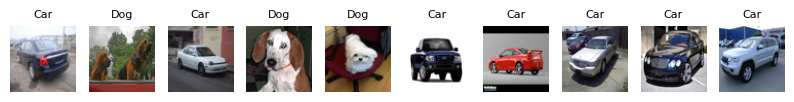

In [45]:
import matplotlib.pyplot as plt

SHAPE_IMAGES = (64, 64)

with h5py.File('dogs.h5', 'r') as hf:
    Xtrain = hf['Xtrain'][:]
    Xtest = hf['Xtest'][:]
    Ytrain = hf['Ytrain'][:]
    Ytest = hf['Ytest'][:]

# Plot first 5 images of each dataset for verification
fig, axes = plt.subplots(1, 10, figsize=(10, 2))
for i in range(10):
    x = Xtrain[:, i].reshape(SHAPE_IMAGES[0], SHAPE_IMAGES[1], 3)
    axes[i].imshow(x)
    axes[i].axis('off')  # Hide the axis
    axes[i].set_title("Dog" if Ytrain[0, i] == 1 else "Car", fontsize=8)

plt.show()

# Parameters Initialization
* A single node made of a matrix W of shape (12288, 1) and a bias b
* Initialize W and b to 0

In [48]:
N, m = X.shape

def sigmoid(z): # Compute the sigmoid of z
    s = 1.0 / (1.0 + np.exp(-z))
    
    return s

W = np.zeros((N, 1), dtype='float')
b = 0.0

8192